<a href="https://colab.research.google.com/github/elenacaires/EVISUS-hackathon-inovadados-/blob/main/EVISUS_prototipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fpdf
!pip install pyTelegramBotAPI

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import telebot

In [4]:
token = <token>
bot = telebot.TeleBot(token)

dfex = pd.read_csv('dfex.csv')
numsem = []
for i in dfex['id'].loc[dfex['subclasse']=='boletinsregulares'].values:
  numsem.append(i[-2:])
totsem = 'Disponíveis boletins de '+str(len(dfex['id'].loc[dfex['subclasse']=='boletinsregulares'].values))+' semanas epidemiológicas.'
comsem = []
for n in numsem:
  comsem.append('/semanareg' + n)
pesqcategorias = []
for i in range(1,26):
  pesqcategorias.append('/categoria'+str(i))
pesqcatdict = {'/categoria1':'Alimentação e Nutrição', '/categoria2':'Ambiente, Trabalho e Saúde', '/categoria3':'Assistência Farmacêutica', '/categoria4':'Avaliação de Tecnologias e Economia da Saúde', '/categoria5':'Bioética e Ética na Pesquisa', '/categoria6':'Complexo Produtivo da Saúde', '/categoria7':'Comunicação e Informação em Saúde', '/categoria8':'Demografia e Saúde', '/categoria9':'Desenvolvimeto de Tecnologias e Inovação em Saúde', '/categoria10':'Doenças Crônicas Não Transmissíveis', '/categoria11':'Doenças Transmissíveis', '/categoria12':'Epidemiologia', '/categoria13':'Gestão do Trabalho e Educação em Saúde', '/categoria14':'Pesquisa Clínica', '/categoria15':'Promoção da Saúde', '/categoria16':'Saúde Bucal', '/categoria17':'Saúde da Criança e do Adolescente', '/categoria18':'Saúde da Mulher', '/categoria19':'Saúde da População Negra e das Comunidades Tradicionais', '/categoria20':'Saúde do Idoso', '/categoria21':'Saúde dos Povos Indígenas', '/categoria22':'Saúde Materno Infantil', '/categoria23':'Saúde Mental', '/categoria24':'Sistemas, Programas e Políticas em Saúde', '/categoria25':'Violência, Acidentes e Trauma'}

In [5]:
@bot.message_handler(commands=['start'])
def msg_boasvindas(message):
  boasvindas = """
  Olá. Meu nome é EviSUS, protótipo criado com o propósito de sistematizar e divulgar dados e evidências cieníficas em saúde no âmbito do SUS.
  Para prosseguir, selecione qual canal deseja acessar (clique no item):
  /canaldogestor Canal destinado a gestores
  /canaldopesquisador Canal destinado a pesquisadores
  /canaldoprofsaude Canal destinado a profissionais de saúde
  """
  bot.send_message(message.chat.id,boasvindas)

  @bot.message_handler(commands=['canaldopesquisador'])
  def msg_pesquisador(message):
    pesq = """
    Bem-vindo ao canal do pesquisador.
    O que você gostaria de acessar?
    /orientacoes Orientações gerais
    /recursos Recursos disponíveis 
    /lacunas Lacunas de conhecimento
    """
    bot.send_message(message.chat.id,pesq)
    
    @bot.message_handler(commands=['orientacoes'])
    def msg_orientacoes(message):
      orient = 'O conteúdo dessa seção ainda não foi adicionado.\nAqui deverão constar orientações gerais aos pesquisadores com relação à produção científica atrelada ao DECIT'
      bot.send_message(message.chat.id,orient)

    @bot.message_handler(commands=['recursos'])
    def msg_recursos(message):
      recursos = 'O conteúdo dessa seção ainda não foi adicionado.\nAqui deverão constar os recursos disponíveis aos pesquisadores.'
      bot.send_message(message.chat.id,recursos)

    @bot.message_handler(commands=['lacunas'])
    def msg_lacunas(message):
      lacunas = 'O conteúdo dessa seção ainda não foi adicionado.\nAqui deverá constar o número de pesquisas realizadas por categoria, destacando aquelas com maior déficit e evidenciando as prioridades em pesquisa atuais do DECIT.'
      bot.send_message(message.chat.id,lacunas)

  @bot.message_handler(commands=['canaldoprofsaude'])
  def msg_profsaude(message):
    profs = """
    Bem-vindo ao canal do profissional de saúde?
    O que você gostaria de acessar?
    /protocolos Protocolos e Diretrizes
    /perfilepidemiologico Perfil clínico-epidemiológico da sua área de atuação
    /atualizacao Atualização técnico-científica à prática clínica
    """
    bot.send_message(message.chat.id,profs)

    @bot.message_handler(commands=['protocolos'])
    def msg_protocolos(message):
      prot = 'O conteúdo dessa seção ainda não foi adicionado.\nAqui deverão constar os protocolos e diretrizes veiculados pelo Ministério da Saúde, por categoria e palavra-chave.'
      bot.send_message(message.chat.id,prot)

    @bot.message_handler(commands=['perfilepidemiologico'])
    def msg_perfilepi(message):
      perfilepi = 'O conteúdo dessa seção ainda não foi adicionado.\nAqui deverão constar panoramas clínico-epidemiológicos, por estado e município, elaborados com base em dados veiculados pelo DATASUS'
      bot.send_message(message.chat.id,perfilepi)

    @bot.message_handler(commands=['atualizacao'])
    def msg_atualiza(message):
      atualiza = 'O conteúdo dessa seção ainda não foi adicionado.\nAqui deverão constar atualizações técnico-científicas à prática clínica, com evidências provenientes de canais como o Pesquisa Saúde e o Genomas Brasil, bem como de sínteses de evidências promovidas no âmbito do DECIT.'
      bot.send_message(message.chat.id,atualiza) 


bot.polling()

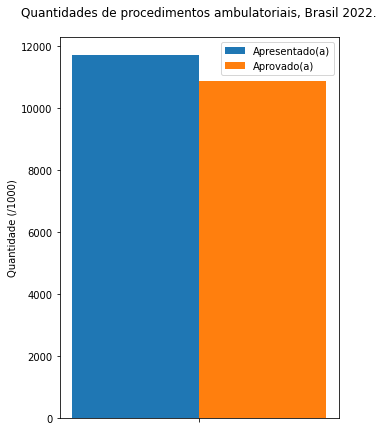

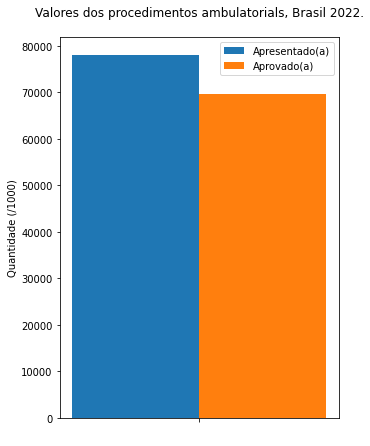

In [6]:
@bot.message_handler(commands=['canaldogestor'])
def msg_gestor(message):
  gest = """
  Bem-vindo ao canal do gestor.
  O que você gostaria de acessar? (clique no item)
  /boletins Boletins epidemiológicos
  /producao Dados relativos à produção ambulatorial e hospitalar no âmbito do SUS
  /epidemiologia Dados epidemiológicos provenientes do DATASUS                       
  /pesquisasaude Recomendações para o SUS com base em pesquisas fomentadas pelo Ministério da Saúde
  """
  bot.send_message(message.chat.id,gest)
  

  @bot.message_handler(commands=['producao'])
  def producao(message):
    prod = """
    Qual nível de produção você gostaria de acessar? (clique no item)
    /ambulatorial Produção ambulatorial
    /hospitalar Produção hospitalar
    """
    bot.send_message(message.chat.id,prod)

    @bot.message_handler(commands=['ambulatorial'])
    def prodamb(message):
      prodamb = """
      Para qual esfera você deseja receber dados sobre a produção ambulatorial em 2022?'
      /panacional Produção ambulatorial nacional
      /paestadual Produção ambulatorial nacional
      /pamunicipal Produção ambulatorial municipal (por município gestor)
      """
      bot.send_message(message.chat.id,prodamb)

      @bot.message_handler(commands=['panacional'])
      def producao(message):
        N = 1
        apres = int(dfex['output'].loc[dfex['id']=='qtdapres'].values[0]) / 1000
        aprov = int(dfex['output'].loc[dfex['id']=='qtdaprov'].values[0]) / 1000
        ind = np.arange(N)
        plt.figure(figsize=(5,7))
        width = 0.3       
        plt.bar(ind, apres , width, label='Apresentado(a)')
        plt.bar(ind + width, aprov, width, label='Aprovado(a)')
        plt.xlabel(' ')
        plt.ylabel('Quantidade (/1000)')
        plt.title('Quantidades de procedimentos ambulatoriais, Brasil 2022.\n')
        plt.xticks(ind + width / 2, (''))
        plt.legend(loc='best')
        pathimage = 'qtd.jpg'
        plt.savefig('qtd.jpg')
        apres = int(dfex['output'].loc[dfex['id']=='valapres'].values[0]) / 1000
        aprov = int(dfex['output'].loc[dfex['id']=='valaprov'].values[0]) / 1000
        plt.figure(figsize=(5,7))      
        plt.bar(ind, apres , width, label='Apresentado(a)')
        plt.bar(ind + width, aprov, width, label='Aprovado(a)')
        plt.xlabel(' ')
        plt.ylabel('Quantidade (/1000)')
        plt.title('Valores dos procedimentos ambulatorials, Brasil 2022.\n')
        plt.xticks(ind + width / 2, (''))
        plt.legend(loc='best')
        pathimage = 'val.jpg'
        plt.savefig('val.jpg')
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size = 12)
        pdf.cell(200, 10, txt = "PROCEDIMENTOS AMBULATORIAIS, BRASIL 2022",ln = 1, align = 'C')
        pdf.cell(200, 10, txt = "Total de procedimentos apresentados: "+str(dfex['output'].loc[dfex['id']=='qtdapres'].values[0]),ln =3, align = 'L')
        pdf.cell(200, 10, txt = "Total de procedimentos aprovados: "+str(dfex['output'].loc[dfex['id']=='qtdaprov'].values[0]),ln =4, align = 'L')
        pdf.cell(200, 10, txt = "Valor total apresentado: "+str(dfex['output'].loc[dfex['id']=='valapres'].values[0]),ln =5, align = 'L')
        pdf.cell(200, 10, txt = "Valor total aprovado: "+str(dfex['output'].loc[dfex['id']=='valaprov'].values[0]),ln =6, align = 'L')
        pdf.image('qtd.jpg', x = 20, y = 70, w = 80, h = 120)
        pdf.image('val.jpg', x = 110, y = 70, w = 80, h = 120)
        pdf.output("prodambnac.pdf") 
        bot.send_document(message.chat.id,open('/content/prodambnac.pdf', 'rb'))
 
  @bot.message_handler(commands=['boletins'])
  def boletins(message):
    bol = """
    Quais boletins você deseja acessar? (clique no item)
    /regulares Boletins epidemiológicos regulares
    /especiais Boletins epidemiológicos especiais                     
    /covid Boletins epidemiológicos da COVID-19
    """
    bot.send_message(message.chat.id,bol)

    @bot.message_handler(commands=['regulares'])
    def bolreg(message):
      breg = f'{totsem}\nSelecione a semana epidemiológica de 2022 cujo boletim regular você deseja acessar (clique no item):\n'
      semreg = ''
      for n in numsem:
        semreg += '/semanareg' + n + ' Boletim da semana epidemiológica ' + n + '.\n'
      bot.send_message(message.chat.id,breg+semreg)

      @bot.message_handler(func=lambda message: message.text in comsem)
      def brsem(message):
        ns = message.text[10:]
        bid = 'be53' + ns
        bs = 'Acesse aqui o boletim da semana epidemiológica ' + ns +': ' + dfex['output'].loc[dfex['id']==bid].values[0]
        bot.send_message(message.chat.id,bs)

    @bot.message_handler(commands=['especiais'])
    def bolesp(message):
      besp = 'O conteúdo dessa seção ainda não foi adicionado.\nAqui deverão constar as semanas epidemiológicas para as quais estão disponíveis boletins especiais'
      bot.send_message(message.chat.id,besp)

    @bot.message_handler(commands=['covid'])
    def bolcov(message):
      bcov = 'O conteúdo dessa seção ainda não foi adicionado.\nAqui deverão constar as semanas epidemiológicas para as quais estão disponíveis boletins COVID-19'
      bot.send_message(message.chat.id,bcov)

  @bot.message_handler(commands=['producao'])
  def producao(message):
    prod = """
    Como você deseja acessar os dados mensais (2022) referentes à Produção Ambulatorial do SUS? (clique no item)
    /producaobr Dados referentes à produção nacional total
    /producaouf Dados referentes à produção por unidade da federação
    /producaomun Dados referentes à produção por município gestor
    """
    bot.send_message(message.chat.id,prod)

    @bot.message_handler(commands=['producaobr'])
    def producaobr(message): 
      prodbr = """Você deseja visualizar dados referentes a:
      /quantidade Quantidade dos procedimentos
      /valor Valor dos procedimentos
      """
      bot.send_message(message.chat.id,prodbr)

  @bot.message_handler(commands=['epidemiologia'])
  def epidemio(message):
    epi = 'O conteúdo dessa seção ainda não foi adicionado.\nAqui deverá constar a funcionalidade de busca por dados (SIH e SIM - haja vista atualização frequente) e relatórios personalizados epidemiológicos.'
    bot.send_message(message.chat.id,epi)

  @bot.message_handler(commands=['pesquisasaude'])
  def pesquisa(message):
    pesq = """
    Como você gostaria de efetuar a busca por pesquisas?
    /categoria Por categoria
    /palavraschave Por palavras-chave
    """
    bot.send_message(message.chat.id,pesq)

    @bot.message_handler(commands=['categoria'])
    def pesqcat(message):
      msgcat = """
      Qual categoria você deseja acessar? (clique no item)
      /categoria1 Alimentação e Nutrição
      /categoria2 Ambiente, Trabalho e Saúde
      /categoria3 Assistência Farmacêutica
      /categoria4 Avaliação de Tecnologias e Economia da Saúde
      /categoria5 Bioética e Ética na Pesquisa
      /categoria6 Complexo Produtivo da Saúde
      /categoria7 Comunicação e Informação em Saúde
      /categoria8 Demografia e Saúde
      /categoria9 Desenvolvimento de Tecnologias e Inovação em Saúde
      /categoria10 Doenças Crônicas Não Transmissíveis
      /categoria11 Doenças Transmissíveis
      /categoria12 Epidemiologia
      /categoria13 Gestão do Trabalho e Educação em Saúde
      /categoria14 Pesquisa Clínica
      /categoria15 Promoção da Saúde
      /categoria16 Saúde Bucal
      /categoria17 Saúde da Criança e do Adolescente
      /categoria18 Saúde da Mulher
      /categoria19 Saúde da População Negra e das Comunidades Tradicionais
      /categoria20 Saúde do Idoso
      /categoria21 Saúde dos Povos Indígenas
      /categoria22 Saúde Materno Infantil
      /categoria23 Saúde Mental 
      /categoria24 Sistemas, Programas e Políticas em Saúde
      /categoria25 Violência, Acidentes e Trauma
      """
      bot.send_message(message.chat.id,msgcat)
      @bot.message_handler(func=lambda message: message.text in pesqcategorias)
      def infocat(message):
        categ = pesqcatdict.get(message.text)
        evicateg = dfex.loc[dfex['id']==categ]
        msg = 'Houve um erro na busca'
        if evicateg.shape[0] == 0:
          msg = 'Não foram encontradas pesquisas nessa categoria.'
        elif evicateg.shape[0] == 1:
          msg = 'Foi encontrada uma pesquisa nessa categoria.'
        else:
          msg = 'Foram encontradas ' + str(evicateg.shape[0]) + ' pesquisas nessa categoria.'
        for i in range(len(evicateg['output'].values)):
          msg += '\nRecomendação ' + str(i+1) + ': \n' + evicateg['output'].values[0]+'.\n'
        bot.send_message(message.chat.id,msg)

bot.polling()